---
title: stata教程03-数据的正态性检验和变量正态化
date: 2018-12-11 18:17:55
tags: [stata]
toc: true
mathjax: true

---

变量是否符合正态分布? 怎么检验变量的正态分布假设? 如果变量不满足正太分布假设怎么办? 下面我们使用stata来回答以上问题。
<span></span>
<!-- more -->

### 数据介绍

使用stata系统自带的数据auto.dta来演示今天的例子。

In [1]:
sysuse auto

(1978 Automobile Data)


查看数据的基本信息:

In [2]:
describe


Contains data from C:\Program Files (x86)\Stata15\ado\base/a/auto.dta
  obs:            74                          1978 Automobile Data
 vars:            12                          13 Apr 2016 17:45
 size:         3,182                          (_dta has notes)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
make            str18   %-18s                 Make and Model
price           int     %8.0gc                Price
mpg     

### 绘制概率图

绘制变量mpg, 查看变量是否和正太分布相似:

(bin=8, start=12, width=3.625)


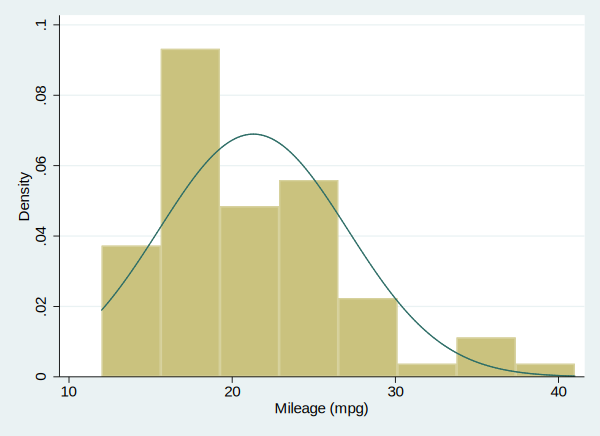

In [3]:
hist mpg, normal

上面的命令中, hist指的是直方图, mpg就是变量名, normal指的是正态密度函数。从图中我们可以看到, 这个数据直方图和正态密度函数的曲线有一些差距, 也可以绘制和密度图:

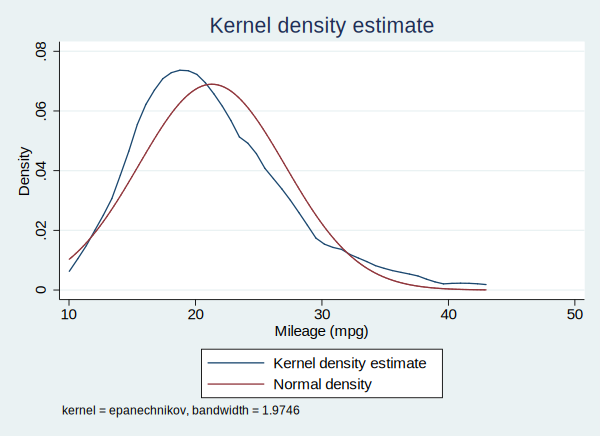

In [4]:
kdensity mpg, normal

绘制变量的QQ图:


(note: file C:/Users/syd/.stata_kernel_cache/graph2.svg not found)


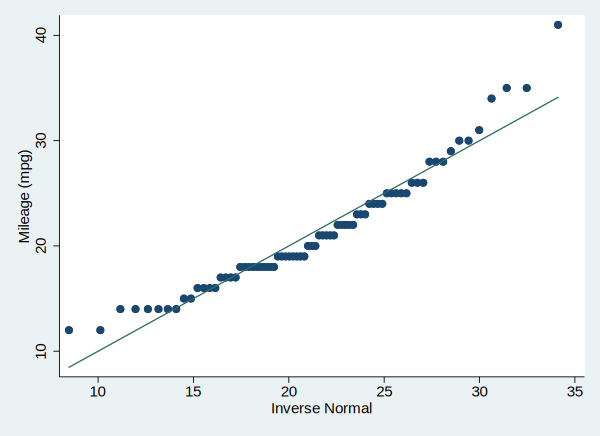

In [5]:
qnorm mpg

### 进行正态性检验

但是不管绘制哪种图形, 都有一个问题, 我们无法精确的检验数据是否满足正态分布的假设。所以, 我们可以进行JB检验:

In [7]:
su mpg, detail


                        Mileage (mpg)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           12             12
 5%           14             12
10%           14             14       Obs                  74
25%           18             14       Sum of Wgt.          74

50%           20                      Mean            21.2973
                        Largest       Std. Dev.      5.785503
75%           25             34
90%           29             35       Variance       33.47205
95%           34             35       Skewness       .9487176
99%           41             41       Kurtosis       3.975005


su命令有一个detail选项, 使用该选项可以输出偏度和峰度, 从上面的结果可以看到偏度Skewness=.9487176, 峰度Kurtosis=3.975005, 根据这两个值, 我们可以计算JB统计量为:

In [9]:
di (r(N)/6) * ((r(skewness)^2) + [(1/4)*(r(kurtosis)-3)^2])

14.031924


由于JB统计量满足自由度为2的卡方分布, 所以我们可以计算JB统计量所对应的p值:

In [10]:
di chi2tail(2, 14.031924)

.00089744


p值小于1%, 因此拒绝虚无假设, 即数据不满足正太分布的假设。

实际上, JB检验有对应的第三方程序, 我们可以使用下面的命令来安装这个程序:

In [11]:
ssc install jb6

checking jb6 consistency and verifying not already installed...
installing into c:\ado\plus\...
installation complete.


然后一个命令即可进行JB检验:

In [12]:
jb6 mpg

Jarque-Bera normality test:  14.03 Chi(2)  9.0e-04
Jarque-Bera test for Ho: normality: (mpg)


进行D'Agostino检验:

In [13]:
sktest mpg


                    Skewness/Kurtosis tests for Normality
                                                          ------ joint ------
    Variable |        Obs  Pr(Skewness)  Pr(Kurtosis) adj chi2(2)   Prob>chi2
-------------+---------------------------------------------------------------
         mpg |         74     0.0015        0.0804       10.95         0.0042


该检验也显示, 变量不属于正态分布。

进行Shapiro-Wilk检验, 结果也类似:

In [14]:
swilk mpg


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
         mpg |         74    0.94821      3.335     2.627    0.00430


进行Shapiro-Francia检验:

In [15]:
sfrancia mpg


                  Shapiro-Francia W' test for normal data

    Variable |       Obs       W'          V'        z       Prob>z
-------------+-----------------------------------------------------
         mpg |        74    0.94872      3.650     2.510    0.00604


### 变量正态化

我们可以对变量取log自然对数, 然后再检验它的正态性:

生成新变量: lnmpg

In [16]:
gen lnmpg = log(mpg)

绘制核密度图:

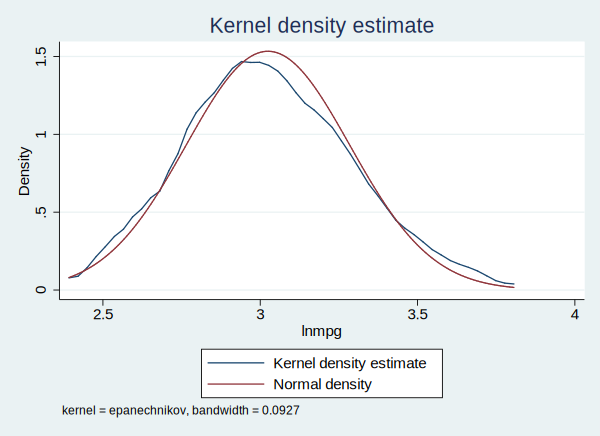

In [17]:
kdensity lnmpg, normal 

这个图看起来更像正态分布了。

进行JB检验:

In [18]:
jb6 lnmpg

Jarque-Bera normality test:  .8632 Chi(2)  .6495
Jarque-Bera test for Ho: normality: (lnmpg)


结果显示, p值并不显著, 我们无法拒绝正态分布的假设。